<a href="https://colab.research.google.com/github/vedhapant/vedhapant/blob/main/Video_Games_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np

# Introdution

Video Games Dataset Regression Exploration

- DataSet Introduction: This dataset has information about the sales and playtime of over a thousand video games released between 2004 and 2010. The playtime information was collected from crowd-sourced data on “How Long to Beat" collected and curated by Dr. Joe Cox. The original dataset can be accessed here :


https://researchportal.port.ac.uk/en/publications/what-makes-a-blockbuster-video-game-an-empirical-analysis-of-us-s

Video games have become a favorite form of entertainment over the past few decades, with millions of players worldwide engaging with various genres and platforms. Understanding what factors contribute to the success of a video game can be important to game developers, publishers, and marketers. By analyzing a dataset of video games released between 2004 and 2010,I can explore how certain characteristic ,impact total sales performance using linear and logistic regression.i

- Research Questions :

Linear Regression Question: What factors influence US Sales of video games ?

Logistic Regression Question: Can we classify games as “high sales” based on their features?

- Response Variables:

Linear Regression: Response = US Sales in millions.

Logistic Regression: Response = Log odds of success of a video game(Success).

- Motivation: Understanding the relationship between US Sales and other factors can provide valuable insights for game developers, publishers, and marketers. For example, if higher review scores consistently correlate with greater sale then developers might prioritize investing in product improvements and user experience enhancement. These insights are not only important for maximizing profits but also for aligning production and game development strategies with consumer preferences. It will also be a helpful metric for investors who seek to understand what strategies drive profitability in the gaming market.

# Linear Regression

In [9]:
df = pd.read_csv('video_games.csv', encoding='unicode-escape')
df_train, df_test = train_test_split(df, test_size = 0.30, random_state = 1024)
## splitting data into training and test to ensure model accuracy

In [10]:
## Linear Regression Model using YearReleased, UsedPrice, ReviewScore, MaxPlayers to predict US Sales
df_train = df_train.rename(columns={'US Sales (millions)': 'US_Sales', 'Review Score': 'Review_Score'})
df_test = df_test.rename(columns={'US Sales (millions)': 'US_Sales', 'Review Score': 'Review_Score'})
model = smf.ols('US_Sales ~ YearReleased + Usedprice + Review_Score + MaxPlayers', data=df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               US_Sales   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     40.04
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           1.43e-31
Time:                        14:55:32   Log-Likelihood:                -1821.6
No. Observations:                1239   AIC:                             3653.
Df Residuals:                    1234   BIC:                             3679.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      107.6063     50.580      2.127      0.034       8.373     206.839
YearReleased    -0.0543      0.025     -2.154      0.031      -0.104      -0.005
Usedprice        0.0271      0.005      5.959      0.000       0.018       0.036
Review_Score     0.0183      0.002      8.228      0.000       0.014       0.023
MaxPlayers       0.0765      0.024      3.195      0.001       0.030       0.123
==============================================================================
Omnibus:                     1651.498   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           288690.858
Skew:                           7.281   Prob(JB):                         0.00
Kurtosis:                      76.349   Cond. No.                     3.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(df_test)
rmse = np.sqrt(mean_squared_error(df_test['US_Sales'], y_pred))
rmse

0.8525493004024168

- Fitted Model for US Sales in Millions:

 ŷ = 107.6063 − 0.0543 × YearReleased + 0.0271 × Usedprice + 0.0183 × Review_Score + 0.0765 × MaxPlayers

- Interpretation of the slope for any variable of interest:

Eg: The slope coefficient for Usedprice is 0.0271. This implies that for each additional unit increase in the price of the used game, the US Sales (millions) increase by 0.0271 million units, holding all other variables constant.


- 95% Confidence Interval and Inference for any variable:  

Eg: The 95% confidence interval for the Usedprice coefficient is (0.018,0.036).This can be interpreted as: We are 95% confident that the true population slope for Usedprice lies within the interval 0.018 - 0.036.

- Model Performance:

R-squared: Value is 0.115, meaning 11.5% of the variability in US Sales (millions) is explained by the model. This is relatively low, suggesting the model does not account for most of the variability in sales, and additional predictors may be needed.

Root Mean Squared Error (RMSE): The RMSE value represents the average deviation between the actual and predicted US_Sales (in millions). An RMSE of 0.8525 means that, on average, the model's predictions for US_Sales are off by about 0.85 million units (850,000 sales). In the context of this dataset, an RMSE of 0.8525 million can be considered high, suggesting that the model's predictions have significant error.

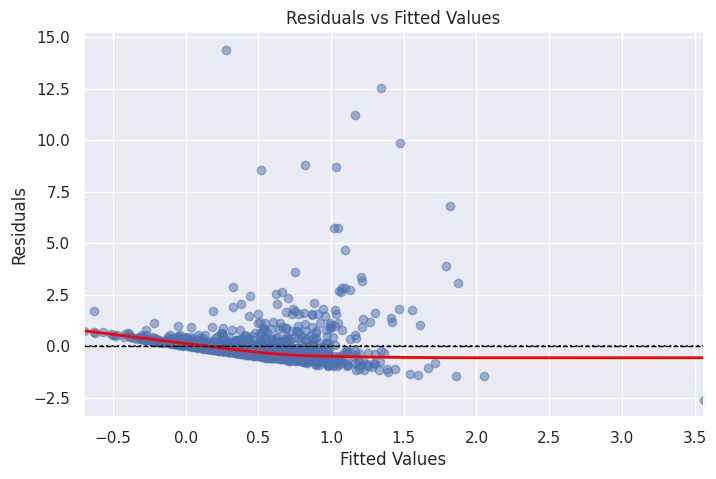

In [12]:
# Residual Plot: Residuals vs Fitted Values: To further analyse the model accuracy
fitted_values = model.fittedvalues
residuals = model.resid

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2}, scatter_kws={'alpha': 0.5})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

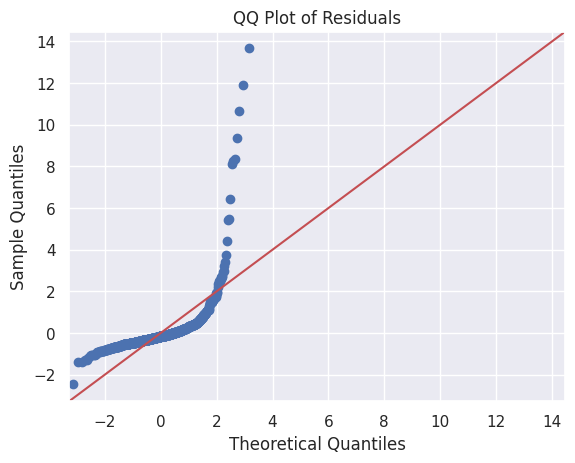

In [13]:
## qq plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show

Fitted vs residual plot: The residuals do not appear to be uniformly scattered throughout the line scattered around the horizontal line at 0 thus the model may not fully capture the relationship between predictors and the response variable or the response variable isn't completely explained by its explanatory variables. So the assumptions of linearity and equal variance aren't satisified

​QQ plot:  The residuals deviate significantly from the theoretical line which shows that the residuals are not normally distributed. So the normality assumption for residuals is violated. This can affect the validity of inference, including confidence intervals and p-values.

# Logistic Regression

In [14]:
df1 = pd.read_csv('video_games.csv', encoding='unicode-escape')
df1 = df1.rename(columns={'Review Score': 'Review_Score'})

In [15]:
## categorical explanatory variable(creating levels to convert quantitative variable to categorial)
## Sequel Levels: One sequel, No sequel, Two sequels
df1['Sequel'] = df1['Sequel'].replace({1: 'One', 0: 'No', 2: 'Two'})
df1['Sequel'].value_counts()

,count
Sequel,
One,920
No,843
Two,7


In [16]:
## Response variable will be Success. If a video game has total US Sales less than the median sale then the Success column
## will record a 0. Whereas if a video game has higher than median sales then the Success column records a 1.
df1['Success'] = np.where(df1['US Sales (millions)'] > df1['US Sales (millions)'].median(), 1, 0)
df1['Success'].value_counts()

,count
Success,
0,895
1,875


In [17]:
## Logistic regression model that predicts odds of video game success based on the console, number of sequels
## review score, price and maximum players

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df1, test_size=0.3, random_state=1024)
logistic_model = smf.logit('Success ~ Console + Sequel + Review_Score+ Usedprice + MaxPlayers', data = train_data).fit()
logistic_model.summary()

         Current function value: 0.575324
         Iterations: 35


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Success   No. Observations:                 1239
Model:                          Logit   Df Residuals:                     1229
Method:                           MLE   Df Model:                            9
Date:                Mon, 27 Jan 2025   Pseudo R-squ.:                  0.1697
Time:                        15:17:19   Log-Likelihood:                -712.83
converged:                      False   LL-Null:                       -858.56
Covariance Type:            nonrobust   LLR p-value:                 1.687e-57
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -5.2649      0.413    -12.742      0.000      -6.075      -4.455
Console[T.Nintendo Wii]      0.9055      0.214      4.237      0.000       0.487       1.324
Console[T.PlayStation 3]     0.5964      0.217      2.743      0.006       0.170       1.023
Console[T.Sony PSP]         -0.0890      0.204     -0.437      0.662      -0.488       0.310
Console[T.X360]              0.5509      0.192      2.870      0.004       0.175       0.927
Sequel[T.One]                0.5914      0.131      4.527      0.000       0.335       0.848
Sequel[T.Two]              -28.6997   6.55e+05  -4.38e-05      1.000   -1.28e+06    1.28e+06
Review_Score                 0.0670      0.006     11.601      0.000       0.056       0.078
Usedprice                   -0.0075      0.009     -0.814      0.416      -0.026       0.011
MaxPlayers                   0.0413      0.057      0.723      0.470      -0.071       0.153
============================================================================================
"""

Characteristics Associated with Higher Probability of Success:

Categorical Variables:

- Nintendo console (Positive coefficient: 0.9055): Games released on Nintendo are associated with a higher likelihood of success compared to the baseline console.

- Playstation 3 console (Positive coefficient: 0.5964): Games on PlayStation 3 also have increased odds of success.

- Sony PSP console (Negative coefficient: -0.0890): Negative association with success for games on Sony PSP.

- T.X360 console (Positive coefficient: 0.5509): X360 games are associated with higher odds of success.

- Games with one sequel (Positive coefficient: 0.5914): Games with one sequel are more likely to succeed.
Sequel

- Games with two sequels (Extreme negative coefficient: -28.699, convergence issue): Likely unreliable due to the convergence issue.

Quantitative Variables:

- Review_Score (Positive coefficient: 0.0670): Higher review scores significantly increase the odds of success.

- Usedprice (Negative coefficient: -0.0075): Negative association so decreasing odds of success so higher the usedprice, lower the odds of success

- MaxPlayers(Positive coefficient: 0.0413): Positive assosciation and increases the odds of success with increase in MaxPlayers

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = logistic_model.predict(test_data)

auc = roc_auc_score(test_data['Success'], y_pred_proba)
auc

0.7739486975767551

Model Accuracy Evaluvation

Pseudo R² of 0.1697: Indicates a lower model fit for our model AUC score of 0.7739: This can be interpreted as the model correctly distinguishes between Success (sales > median) and Non-Success 77.3% of the time. This shows that the model has a moderate ability to classify outcomes, but there is still room for improvement.

# Classifier

In [19]:
## Building a classifier with a threshold 0.5
test_data['Predicted_Prob'] = logistic_model.predict(test_data)
test_data['Predicted_Class'] = (test_data['Predicted_Prob'] >= 0.5).astype(int)
test_data[['Predicted_Prob', 'Predicted_Class']].head()

,Predicted_Prob,Predicted_Class
1709,0.846077,1
769,0.412651,0
680,0.444398,0
639,0.772622,1
1723,0.668978,1


In [25]:
## Generating a confusion matrix using test data to generate:
## tn - True Negatives , tp - True Positives, fp - False Positives , fn - False Negatives
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

cm = confusion_matrix(test_data['Success'], test_data['Predicted_Class'])
tn, fp, fn, tp = cm.ravel()


In [26]:
## Calculating the accuracy, senstivity and specificity of the classifier
accuracy = (tn+tp)/(tn+tp+fn+fp)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print( accuracy, sensitivity, specificity)

0.7005649717514124 0.6791044776119403 0.7224334600760456


Interpretation:

-  Accuracy (70.1%)
Accuracy represents the overall effectiveness of the model in making correct predictions. In this case, the model correctly classifies 70.1% of all instances, whether they are successes or failures. While this is a good indication of general performance, it doesn't reveal how well the model distinguishes between the specific classes.

-  Sensitivity (67.9%)
Sensitivity, or the true positive rate, indicates the model's ability to correctly identify successful cases. Here, 67.9% of actual successes are detected by the model. This shows the model performs reasonably well but might miss some true successes, which could be an issue if identifying successes is critical.

- Specificity (72.2%)
Specificity measures the model's ability to correctly identify failures. At 72.2%, the model is slightly better at recognizing failures compared to successes. This is useful if avoiding false positives (incorrectly predicting success) is important for the application.

Errors we want to minimize:

- Minimizing False Negatives (FN): If predicting Success corresponds to importyant things like investments, marketing anf future projects, missing actual successes could mean missed revenue opportunities.

- Minimizing False Positives (FP): If Success predictions lead to wasted resources on a video game, minimizing overestimation is important. In this case, I would say that a false negative is probably the error I want to avoid

Comparing classifier results with AUC score:

The classifier achieves an accuracy of 70.1%, a sensitivity of 67.9%, and a specificity of 72.2%. While the accuracy and AUC score (0.773) suggest moderate performance, the sensitivity indicates that 32.1% of actual successes (Success = 1) are misclassified as non-successes, which is a concern since False Negatives (FN) need to be reduced. Missing actual successes could result in lost opportunities. Although the specificity is slightly higher (72.2%), indicating better performance at avoiding False Positives, the current classifier might not be ideal for minimizing False Negatives.

# Conclusion

 In the linear regression task, I aimed to predict US sales using predictors like the year of release, used price, review score, and maximum players. The model explained 11.5% of the variance in sales (R-squared = 0.115), indicating a limited ability to capture the variability in sales, and the RMSE of 0.8525 million units suggests substantial error in the predictions. Residual diagnostic plots revealed violations of key linear regression assumptions, such as linearity, equal variance, and normality.

 For the logistic regression task, I modeled the probability of a game being a "success" based on sales exceeding the median, using predictors such as genre (Action vs. Non-Action), console, review scores, used price, and maximum players. The logistic model had a pseudo R-squared of 0.17 and an AUC score of 0.773, showing moderate predictive power. However, sensitivity and specificity values show a trade-off between correctly identifying successes and avoiding false positives. This means there are areas for improvement in classification.


Limitations:

The linear regression faced limitations in explanatory power, as the R-squared value was really low. The assumption violations suggest that the relationship between predictors and the response variable may be non-linear or influenced by omitted variables.

In the logistic regression, categorical variables like Genre required significant preprocessing. Additionally, the potential multicollinearity in predictors and convergence issues in the logistic model may have affected interpretability and stability of results. These limitations restrict the ability to draw strong conclusions or apply the results to broader contexts like market forecasting or game design optimization.


Future Analysis:

Linear regression could involve including non-linear terms or interaction effects to better capture relationships between predictors and sales. Advanced regression techniques like ridge or lasso regression may address multicollinearity and improve model performance. Future research could also investigate specific segments of the dataset, such as differences in predictors for Action versus Non-Action genres or the impact of console exclusivity, to provide better results.